<a href="https://colab.research.google.com/github/juank2572/codigo-LSTM-MultivariadoJuan-Carlos-Anaya-/blob/main/MODELO_ARIMA_ANN_JUAN_CARLOS_ANAYA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np

# Cargar y preparar datos
from google.colab import drive
drive.mount('/content/drive')

!ls "/content/drive/MyDrive/Colab Notebooks/"


ruta_archivo = '/content/drive/MyDrive/Colab Notebooks/DATA_ENERGIAMULTIVARIABLE_FINAL.xlsx'
df = pd.read_excel(ruta_archivo)

# Convertir 'Datetime' a datetime y crear variables temporales
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['hour'] = df['Datetime'].dt.hour
df['dayofweek'] = df['Datetime'].dt.dayofweek

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 archivo_transformado.csv
 archivo_transformado.xlsx
'CONVERTIR DATOS MULTIVARIADO.ipynb'
'CONVERTIR DATOS UNIVARIADO.ipynb'
'Copia de CONVERTIR DATOS.ipynb'
'Copia de CONVERTIR DATOS MULTIVARIADO (1).ipynb'
'Copia de CONVERTIR DATOS MULTIVARIADO.ipynb'
'Copia de Copia de LSTM_TESIS_1.ipynb'
'Copia de Limpieza de datos.ipynb'
'Copia de LSTM_CON TENSOR_ABRIL23.ipynb'
'Copia de LSTM_TESIS_1.ipynb'
'Copia de LSTM_TESIS.ipynb'
'Copia de MODEL CNN + LSTM 01 (1).ipynb'
'Copia de MODEL CNN + LSTM 01 (2).ipynb'
'Copia de MODEL CNN + LSTM 01.ipynb'
'Copia de MODELO_FINAL.ipynb'
'Copia de modelo LSTM 08.ipynb'
'Copia de MODELO_LSTM_MULTIVARIADO_04.ipynb'
'Copia de MODELO_LSTM_UNIVARIANTE.ipynb'
'Copia de MODELO MULTIVARIADO 07.ipynb'
'Copia de MODELO_MULTIVARIADO_LSTM_01 (1).ipynb'
'Copia de MODELO_MULTIVARIADO_LSTM_01.ipynb'
'Copia de MODELO_MULTIVARIADO_LSTM_02.ipynb

ARIMA - MSE: 171845.6731, MAE: 285.3859, R2: -0.0796


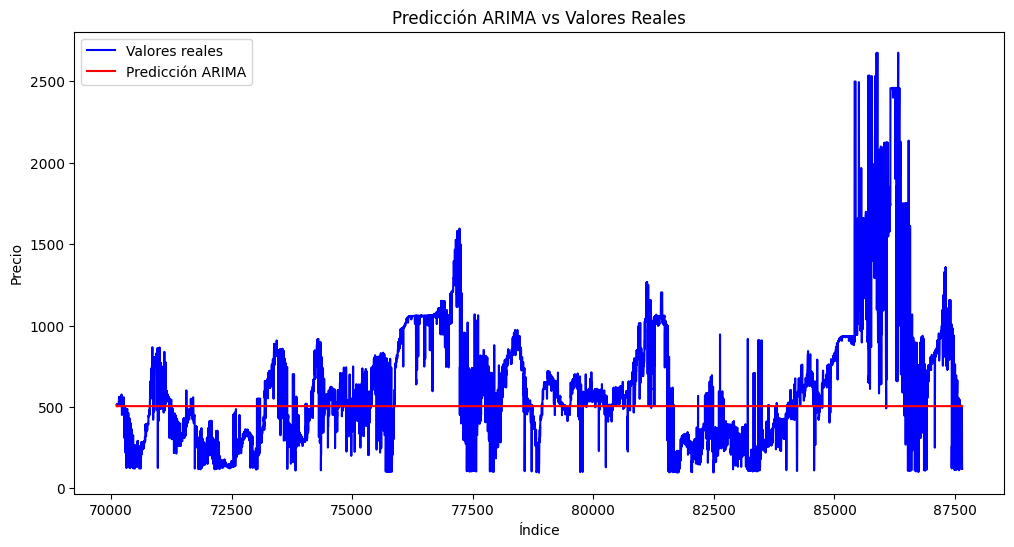

In [ ]:
# ============================
# MODELO ARIMA PARA SERIES DE TIEMPO DE PRECIOS DE ENERGÍA
# ============================

# 1. Importar librerías necesarias
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 2. Seleccionar la columna de precios (ajusta el nombre si es diferente)
# Por ejemplo, si tu columna se llama 'value'
serie_precios = df['value']  # Cambia 'value' por el nombre correcto si es necesario

# 3. Dividir en entrenamiento y prueba (80% train, 20% test)
n_train = int(len(serie_precios) * 0.8)
train, test = serie_precios[:n_train], serie_precios[n_train:]

# 4. Ajustar el modelo ARIMA (puedes probar diferentes órdenes)
modelo_arima = ARIMA(train, order=(5,1,0))  # (p,d,q) puedes cambiarlo si quieres experimentar
modelo_arima_fit = modelo_arima.fit()

# 5. Hacer predicciones
predicciones_arima = modelo_arima_fit.forecast(steps=len(test))

# 6. Calcular métricas de desempeño
mse_arima = mean_squared_error(test, predicciones_arima)
mae_arima = mean_absolute_error(test, predicciones_arima)
r2_arima = r2_score(test, predicciones_arima)

print(f'ARIMA - MSE: {mse_arima:.4f}, MAE: {mae_arima:.4f}, R2: {r2_arima:.4f}')

# 7. Graficar resultados
plt.figure(figsize=(12,6))
plt.plot(test.index, test.values, label='Valores reales', color='blue')
plt.plot(test.index, predicciones_arima, label='Predicción ARIMA', color='red')
plt.legend()
plt.title('Predicción ARIMA vs Valores Reales')
plt.xlabel('Índice')
plt.ylabel('Precio')
plt.show()


In [ ]:
# Calcula el MAPE
mape_arima = np.mean(np.abs((test - predicciones_arima) / test)) * 100
print(f'ARIMA - MAPE: {mape_arima:.2f}%')


ARIMA - MAPE: 62.91%


In [ ]:
# ============================
# ANN MULTIVARIADO CON VARIABLES EXÓGENAS
# ============================

# 1. Importar librerías necesarias
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 2. Definir las variables exógenas y la variable objetivo
exog_vars = [
    'CONTRATOS DE ENERGÍA',
    'GENERACION (kW)',
    'CONSUMO  COMBUSTIBLE MBTU',
    'hour',
    'dayofweek'
]

# 3. Preparar los datos (asegúrate de que no haya valores nulos)
df_model = df.dropna(subset=exog_vars + ['value'])  # 'value' es la columna de precios

X = df_model[exog_vars].values
y = df_model['value'].values  # Cambia 'value' si tu columna de precios tiene otro nombre

# 4. División en entrenamiento y prueba (80/20)
n_train = int(len(X) * 0.8)
X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

# 5. Escalado de las variables exógenas
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Entrenar el modelo ANN multivariado
mlp = MLPRegressor(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

# 7. Predicción
y_pred_ann = mlp.predict(X_test_scaled)

# 8. Métricas de desempeño
mse_ann = mean_squared_error(y_test, y_pred_ann)
mae_ann = mean_absolute_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)
mape_ann = np.mean(np.abs((y_test - y_pred_ann) / y_test)) * 100

print(f'ANN multivariado - MSE: {mse_ann:.4f}, MAE: {mae_ann:.4f}, R2: {r2_ann:.4f}, MAPE: {mape_ann:.2f}%')

# 9. Graficar resultados
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Valores reales', color='blue')
plt.plot(y_pred_ann, label='Predicción ANN multivariado', color='green')
plt.legend()
plt.title('Predicción ANN multivariado vs Valores Reales')
plt.xlabel('Índice')
plt.ylabel('Precio')
plt.show()


KeyError: ['CONTRATOS DE ENERGÍA', 'GENERACION (kW)']

In [ ]:
print(df.columns.tolist())


['Datetime', 'value', 'CONTRATOS DE ENERGIA', 'GENERACION (KW)', 'CONSUMO  COMBUSTIBLE MBTU', 'hour', 'dayofweek']


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ANN multivariado - MSE: 436003.3094, MAE: 510.6680, R2: -1.7392, MAPE: 74.14%


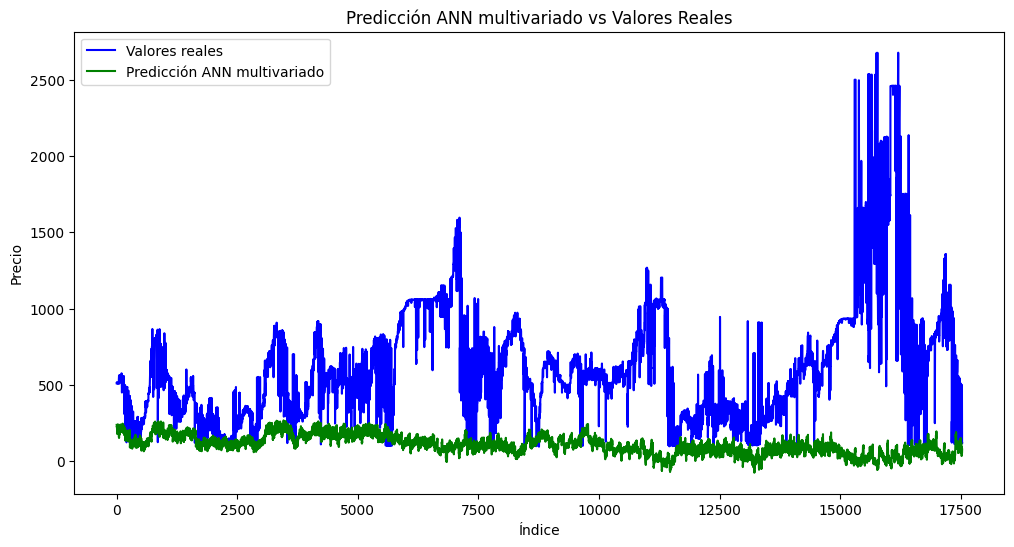

In [ ]:
# ============================
# ANN MULTIVARIADO CON VARIABLES EXÓGENAS (NOMBRES CORREGIDOS)
# ============================

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 1. Definir las variables exógenas y la variable objetivo con los nombres correctos
exog_vars = [
    'CONTRATOS DE ENERGIA',
    'GENERACION (KW)',
    'CONSUMO  COMBUSTIBLE MBTU',
    'hour',
    'dayofweek'
]

# 2. Preparar los datos (asegúrate de que no haya valores nulos)
df_model = df.dropna(subset=exog_vars + ['value'])  # 'value' es la columna de precios

X = df_model[exog_vars].values
y = df_model['value'].values  # 'value' es la columna de precios

# 3. División en entrenamiento y prueba (80/20)
n_train = int(len(X) * 0.8)
X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

# 4. Escalado de las variables exógenas
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Entrenar el modelo ANN multivariado
mlp = MLPRegressor(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

# 6. Predicción
y_pred_ann = mlp.predict(X_test_scaled)

# 7. Métricas de desempeño
mse_ann = mean_squared_error(y_test, y_pred_ann)
mae_ann = mean_absolute_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)
mape_ann = np.mean(np.abs((y_test - y_pred_ann) / y_test)) * 100

print(f'ANN multivariado - MSE: {mse_ann:.4f}, MAE: {mae_ann:.4f}, R2: {r2_ann:.4f}, MAPE: {mape_ann:.2f}%')

# 8. Graficar resultados
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Valores reales', color='blue')
plt.plot(y_pred_ann, label='Predicción ANN multivariado', color='green')
plt.legend()
plt.title('Predicción ANN multivariado vs Valores Reales')
plt.xlabel('Índice')
plt.ylabel('Precio')
plt.show()
